# Investor Classifier


### Context
This project aims to develop an investor classifier model that helps investment banking teams accurately predict which investors will commit to a syndicated credit deal (or “syndicated revolve”) and at what size. The model’s primary goal is to optimize the allocation process by leveraging past deal data encompassing investor behavior, fee structures, and market conditions to determine which participants are most likely to invest under specific terms. By learning from historical patterns, the model can provide data-driven recommendations, ultimately increasing the likelihood of successful deal syndication for both the corporate client and participating financial institutions.

### Background
Traditionally, investment banks have relied on heuristic approaches or basic spreadsheets to map out which investors should be invited to a syndicate and how much each should commit. However, these methods often assume relatively static relationships between deal parameters (e.g., fees, spreads, tenors) and investor participation. In reality, investor behavior can fluctuate widely due to changes in market conditions, shifts in risk appetite, or variations in the overall deal pipeline. As a result, simplistic approaches risk over or under-allocating commitments, jeopardizing a balanced and profitable syndication. By using more robust classification techniques, it becomes possible to capture the nuanced, non-static nature of investor decisions and make more reliable predictions-thereby better serving clients while preserving the long-term relationships that underpin repeat business in investment banking.

### 1. Investor Classifier Introduction

### 2. Data Exploration & Feature Engineering

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

investor_data = pd.read_csv('C:\\Users\\teddytenetcha\\Desktop\\MLE Test\\ML 05. Module Files\\investor_data.csv')
investor_data.head(3)

,investor,commit,deal_size,invite,rating,int_rate,covenants,total_fees,fee_share,prior_tier,invite_tier
0,Goldman Sachs,Commit,300,40,2,Market,2,30,0.0,Participant,Bookrunner
1,Deutsche Bank,Decline,1200,140,2,Market,2,115,20.1,Bookrunner,Participant
2,Bank of America,Commit,900,130,3,Market,2,98,24.4,Bookrunner,Bookrunner


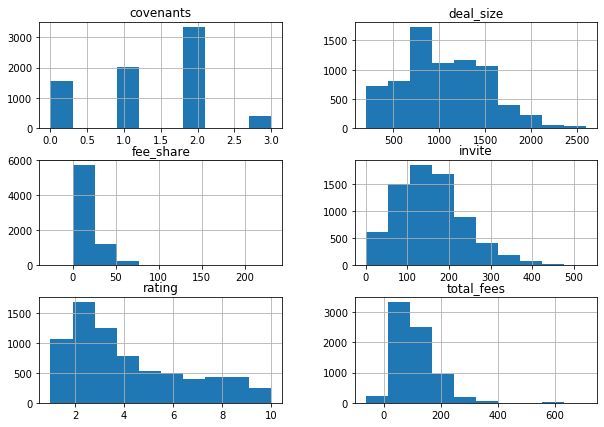

In [2]:
investor_data.hist(figsize=(10, 7))
plt.show()

### Investor Data Fees

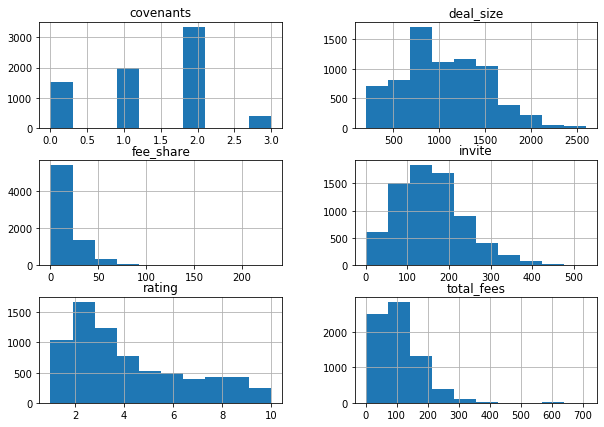

In [3]:
investor_data = investor_data[investor_data.total_fees > 0]
investor_data.hist(figsize=(10, 7))
plt.show()

### Participants Commit/Decline

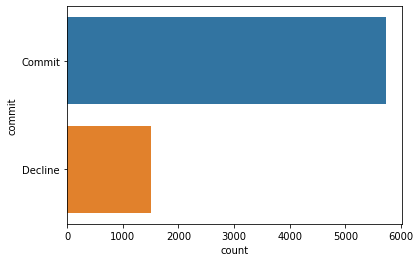

In [4]:
sns.countplot(y='commit', data=investor_data)
plt.show()

### Grouping 

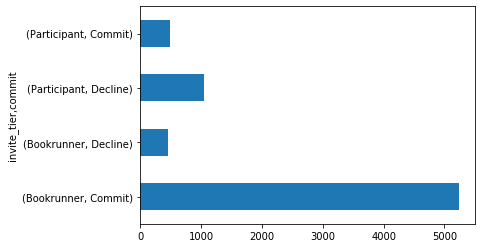

In [5]:
investor_data.groupby('invite_tier').commit.value_counts().plot(kind='barh')
plt.show()

### Participants Prior Tier

In [6]:
investor_data['tier_change'] = np.where(
    investor_data.prior_tier == investor_data.invite_tier, 'None', np.where(
        investor_data.prior_tier == 'Participant', 'Promoted', 'Demoted'
    )
)

investor_data.head(3)

,investor,commit,deal_size,invite,rating,int_rate,covenants,total_fees,fee_share,prior_tier,invite_tier,tier_change
0,Goldman Sachs,Commit,300,40,2,Market,2,30,0.0,Participant,Bookrunner,Promoted
1,Deutsche Bank,Decline,1200,140,2,Market,2,115,20.1,Bookrunner,Participant,Demoted
2,Bank of America,Commit,900,130,3,Market,2,98,24.4,Bookrunner,Bookrunner,None


### Goldman Sachs Example

In [7]:
investor_data[investor_data.investor == 'Goldman Sachs'].groupby('commit').median()

,deal_size,invite,rating,covenants,total_fees,fee_share
commit,,,,,,
Commit,1100.0,170.0,3.0,1.5,107.0,14.35
Decline,900.0,100.0,3.0,2.0,68.0,5.65


In [8]:
investor_data['fee_percent'] = investor_data.fee_share / investor_data.total_fees
investor_data['invite_percent'] = investor_data.invite / investor_data.deal_size

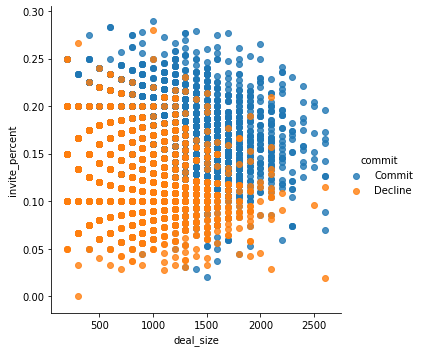

In [9]:
sns.lmplot(x='deal_size', y='invite_percent', hue='commit', data=investor_data, fit_reg=False)
plt.show()

### Goldman Sachs Case Interpretation
It appears that Goldman Sachs engages in a variety of transactions across different deal sizes, with a noticeable distribution of both "commit" and "non-commit" deals. The scatter plot shows no strong linear relationship between the deal size and investor percentage, suggesting that Goldman Sachs' decision to commit to a deal may not predominantly depend on these two factors. Commit deals (orange) are spread across the deal sizes, with a moderate concentration in the mid-size range, while non-commit deals (blue) are more widely distributed across both smaller and larger deals. This suggests that other external factors, such as the market conditions, specific deal dynamics, or investor confidence, may play a significant role in Goldman Sachs' decision-making process. 